In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_excel('Dry_Bean_Dataset.xlsx')
dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
X = dataset.iloc[:,0:-1]
y = dataset['Class']

In [5]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

In [6]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [7]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [8]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [9]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.64 Best Kernel =  linear Best Nu =  1.02 Best Epsilon =  3.77
Best Accuracy =  0.69 Best Kernel =  linear Best Nu =  0.03 Best Epsilon =  1.2
Best Accuracy =  0.44 Best Kernel =  poly Best Nu =  8.33 Best Epsilon =  7.3
Best Accuracy =  0.51 Best Kernel =  linear Best Nu =  6.91 Best Epsilon =  9.58
Best Accuracy =  0.38 Best Kernel =  linear Best Nu =  5.49 Best Epsilon =  6.93
Best Accuracy =  0.51 Best Kernel =  poly Best Nu =  8.21 Best Epsilon =  6.73
Best Accuracy =  0.52 Best Kernel =  linear Best Nu =  1.53 Best Epsilon =  1.57
Best Accuracy =  0.54 Best Kernel =  poly Best Nu =  8.11 Best Epsilon =  7.4
Best Accuracy =  0.38 Best Kernel =  linear Best Nu =  6.31 Best Epsilon =  7.09
Best Accuracy =  0.32 Best Kernel =  linear Best Nu =  9.66 Best Epsilon =  3.47


In [10]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.64,linear,1.02,3.77
1,2,0.69,linear,0.03,1.20
2,3,0.44,poly,8.33,7.30
3,4,0.51,linear,6.91,9.58
4,5,0.38,linear,5.49,6.93
5,6,0.51,poly,8.21,6.73
6,7,0.52,linear,1.53,1.57
7,8,0.54,poly,8.11,7.40
8,9,0.38,linear,6.31,7.09
9,10,0.32,linear,9.66,3.47


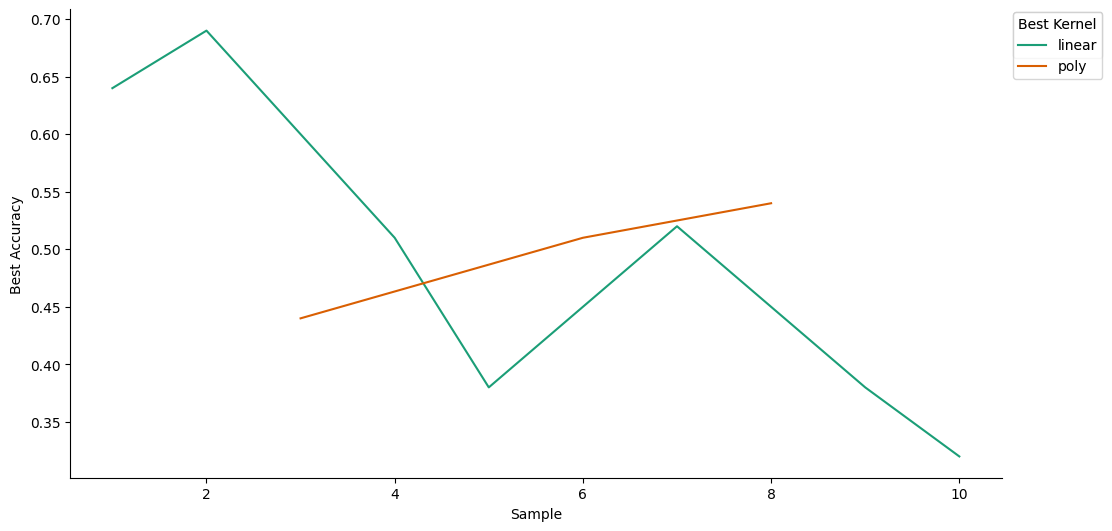

In [15]:
# @title Sample vs Best Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sample']
  ys = series['Best Accuracy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result.sort_values('Sample', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Best Kernel')):
  _plot_series(series, series_name, i)
  fig.legend(title='Best Kernel', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sample')
_ = plt.ylabel('Best Accuracy')

In [11]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [12]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,train_sizes = np.linspace(0.01, 1.0, 50))

In [13]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

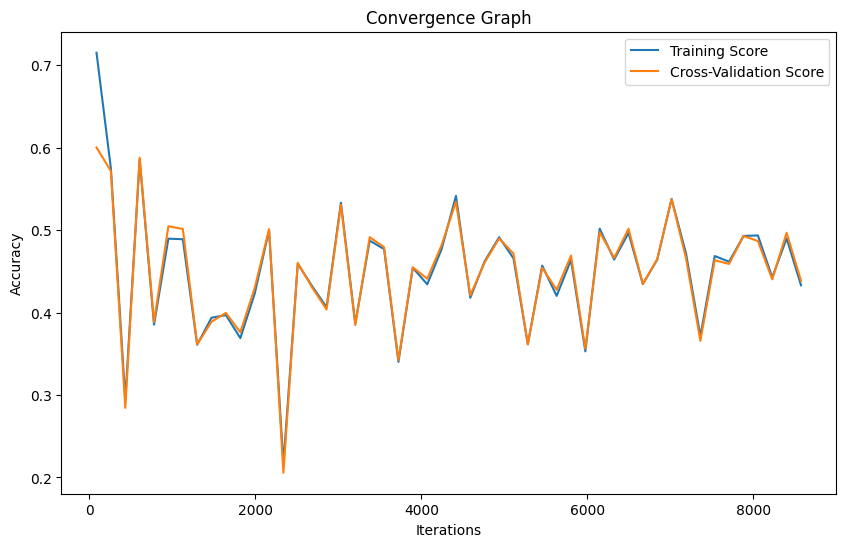

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()